# 00 Preparation
Laden der für die Bearbeitung notwendigen Bibliotheken 📚.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 01 Load Data
Laden des Dataset 💳:

In [2]:
# LOAD DATA
df = pd.read_csv('07_penguins_data.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
338,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
339,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
340,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


# 02 Fehlende Werte
Existieren **fehlende Werte** in dem Dataset? Falls ja, entferne 🗑 diese Zeilen oder ersetze ⤹🔠 die fehlenden Werte mit einem passenden Wert.

In [3]:
# ALLE SPALTEN MIT FEHLENDEN WERTEN FINDEN
missing_values = df.isnull().sum()
missing_values

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

In [4]:
# MEAN FÜR SPALTE MIT FEHLENDEN WERTEN BERECHNEN
mode_sex = df['sex'].mode()[0]


# FELENDE WERTE DURCH MEAN ERSETZEN (vorher Sicherungskopie machen)
df_cleaned = df.copy()
df_cleaned['sex'] = df_cleaned['sex'].fillna(mode_sex)

# 03 One-Hot-Encoding
Die meisten ML-Algorithmen können nur mit **numerischen Daten** arbeiten. Daher müssen wir zunächst alle nicht-numerischen Spalten mittels **One-Hot-Encoding** 🔥 in numerische Spalten umwandeln. Dabei wird jede Kategorie in eine separate Spalte umgewandelt. Jede dieser Spalten erhält einen binären Wert (1 oder 0).

In [5]:
# ONE-HOT-ENCODING FÜR ALLE KATEGORISCHEN SPALTEN
df_encoded = pd.get_dummies(df_cleaned, columns=['island', 'sex'], drop_first=True)
df_encoded

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,2007,False,True,True
1,Adelie,39.5,17.4,186,3800,2007,False,True,False
2,Adelie,40.3,18.0,195,3250,2007,False,True,False
3,Adelie,36.7,19.3,193,3450,2007,False,True,False
4,Adelie,39.3,20.6,190,3650,2007,False,True,True
...,...,...,...,...,...,...,...,...,...
337,Chinstrap,55.8,19.8,207,4000,2009,True,False,True
338,Chinstrap,43.5,18.1,202,3400,2009,True,False,False
339,Chinstrap,49.6,18.2,193,3775,2009,True,False,True
340,Chinstrap,50.8,19.0,210,4100,2009,True,False,True


# 04 Label Encoding
**Zweck:** Bei einer Klassifikationsaufgabe muss die Zielvariable (das, was das Modell vorhersagen soll) in einem einzelnen Zahlenformat vorliegen, wobei jede Klasse durch eine **ganze Zahl** repräsentiert wird. Darum muss für die Zielvariable (die 3 Species enthält) Label-Encoding 🏷️ verwendet werden.

In [6]:
# LABEL ENCODING FÜR DIE ZIELVARIABLE
label_encoder = LabelEncoder()
df_encoded['species'] = label_encoder.fit_transform(df_cleaned['species'])

# 04 Split Data
Aufteilen der Daten ✂️ in ein Trainings- und Testdatenset.

In [7]:
# AUFZEILEN IN FEATURES UND ZIELVARIABLE
X = df_encoded.drop(['species'], axis=1)
Y = df_encoded['species']

# SPLIT in 70% TRAIN und 30% TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234, stratify=df_encoded['species'])

# 05 Train Model
Das Model mit einer **Logistischen Regression** trainieren 💪.

In [8]:
# DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier(random_state=1234)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1234)

In [9]:
# VORHERSAGEN MACHEN
Y_pred = dtc.predict(X_test)

# 06 Modell Evaluieren
Die Kennzahlen **Accuracy** und **Recall berechnen**, um zu bestimmen, wie gut unsere Vorhersagen sind 🧐.

In [10]:
# KENNZAHLEN BERECHNEN
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')
precision = precision_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# KENNZAHLEN AUSGEBEN
print(f"Accuracy: {accuracy:.2f}\nRecall: {recall:.2f}\nPrecision: {precision:.2f}\nF1-Score: {f1:.2f}")

Accuracy: 0.98
Recall: 0.98
Precision: 0.98
F1-Score: 0.98


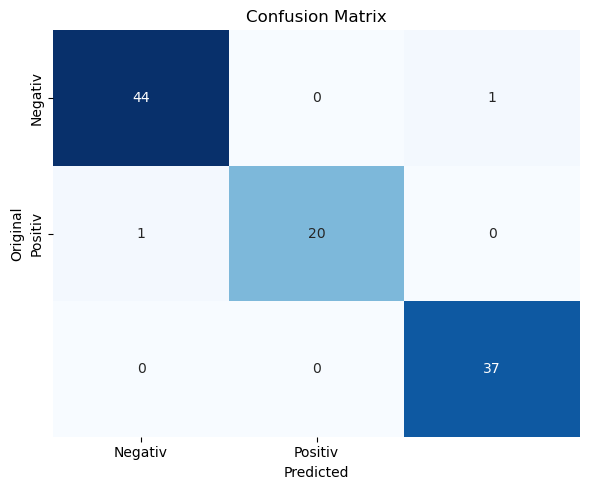

In [11]:
# CONFUSION MATRIX AUSGEBEN
cm = confusion_matrix(Y_test, Y_pred)

# KLASSEN LABEL
labels = ['Negativ', 'Positiv']

# VISUALISIERUNNG
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()